In [ ]:
!pip install opencv-python

In [210]:
import numpy as np
import pandas as pd
import cv2
import random
import os  
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
import tensorflow as tf

In [ ]:
plt.figure(figsize=(20,20))
img_folder='C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\archive\\Images\\Images'
for i in range(5):
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    img=plt.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

In [16]:
IMG_WIDTH=180
IMG_HEIGHT=180

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data=[]

for i, file in tqdm(enumerate(os.listdir(img_folder))):
    label=i
    
    img = cv2.imread(img_folder+"/"+file, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (180, 180))
    imgs = img.reshape((1, img.shape[0], img.shape[1], 1))
    data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[.3, .8])
    data_generator.fit(imgs)
    image_iterator = data_generator.flow(imgs)
    
    if(file.startswith('10')):
        file=file[:3]
    else:
        file=file[:2]
    
    for x in range(15):
        img_transformed=image_iterator.next()[0].astype('int')/255
        data.append([img_transformed, file])

shuffle(data)

np.save('C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\data.npy', data)

2706it [03:53, 11.58it/s]
C:\Users\glmor\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [4]:
data = np.load('C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\data.npy', allow_pickle=True)

In [5]:
len(data)

40590

In [6]:
#80%
train=data[:32472]
#20%
test=data[32472:]

train_X=[]
train_y=[]
for x in train:
    train_X.append(x[0]) 
    train_y.append(x[1])
    
test_X=[]
test_y=[]
for x in test:
    test_X.append(x[0]) 
    test_y.append(x[1])


In [7]:
train_X=np.array(train_X)
train_y=np.array(train_y)

test_X=np.array(test_X)
test_y=np.array(test_y)

In [8]:
target_dict={k: v for v, k in enumerate(np.unique(train_y))}
target_dict

{'10C': 0,
 '10D': 1,
 '10H': 2,
 '10S': 3,
 '2C': 4,
 '2D': 5,
 '2H': 6,
 '2S': 7,
 '3C': 8,
 '3D': 9,
 '3H': 10,
 '3S': 11,
 '4C': 12,
 '4D': 13,
 '4H': 14,
 '4S': 15,
 '5C': 16,
 '5D': 17,
 '5H': 18,
 '5S': 19,
 '6C': 20,
 '6D': 21,
 '6H': 22,
 '6S': 23,
 '7C': 24,
 '7D': 25,
 '7H': 26,
 '7S': 27,
 '8C': 28,
 '8D': 29,
 '8H': 30,
 '8S': 31,
 '9C': 32,
 '9D': 33,
 '9H': 34,
 '9S': 35,
 'AC': 36,
 'AD': 37,
 'AH': 38,
 'AS': 39,
 'JC': 40,
 'JD': 41,
 'JH': 42,
 'JS': 43,
 'KC': 44,
 'KD': 45,
 'KH': 46,
 'KS': 47,
 'QC': 48,
 'QD': 49,
 'QH': 50,
 'QS': 51}

In [10]:
target_val=  [target_dict[train_y[i]] for i in range(len(train_y))]
target_val

[42,
 16,
 44,
 50,
 49,
 3,
 35,
 49,
 16,
 19,
 51,
 50,
 17,
 6,
 10,
 29,
 21,
 31,
 17,
 20,
 3,
 28,
 46,
 15,
 28,
 31,
 0,
 18,
 5,
 15,
 5,
 44,
 10,
 12,
 45,
 47,
 24,
 46,
 7,
 12,
 41,
 49,
 43,
 17,
 42,
 40,
 5,
 19,
 20,
 21,
 0,
 9,
 16,
 8,
 15,
 41,
 23,
 27,
 44,
 48,
 34,
 20,
 6,
 18,
 46,
 18,
 46,
 22,
 48,
 13,
 50,
 21,
 34,
 7,
 30,
 31,
 38,
 45,
 34,
 46,
 22,
 16,
 51,
 9,
 39,
 7,
 37,
 49,
 2,
 26,
 33,
 38,
 6,
 38,
 47,
 45,
 34,
 26,
 13,
 26,
 7,
 24,
 30,
 41,
 6,
 0,
 16,
 12,
 5,
 49,
 25,
 20,
 24,
 14,
 7,
 8,
 3,
 44,
 35,
 41,
 31,
 24,
 0,
 8,
 13,
 47,
 15,
 17,
 48,
 12,
 44,
 17,
 20,
 23,
 1,
 20,
 17,
 47,
 45,
 11,
 33,
 25,
 19,
 48,
 47,
 7,
 24,
 21,
 24,
 12,
 3,
 37,
 31,
 6,
 10,
 2,
 8,
 46,
 50,
 5,
 38,
 15,
 6,
 37,
 40,
 29,
 50,
 47,
 4,
 28,
 11,
 12,
 18,
 10,
 42,
 50,
 36,
 50,
 42,
 30,
 16,
 23,
 25,
 16,
 47,
 24,
 43,
 47,
 32,
 23,
 33,
 10,
 34,
 26,
 42,
 42,
 22,
 11,
 41,
 26,
 11,
 8,
 44,
 10,
 15,
 9,
 22,
 4

In [11]:
tf.keras.backend.clear_session()

np.random.seed(42)
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(train_X.shape[1], train_X.shape[2], train_X.shape[3])),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(52, activation='softmax')
])

In [12]:
target_val=np.array(target_val)

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='RMSProp', metrics=['accuracy'])
history = model.fit(train_X, target_val, batch_size=32,validation_split=.2,epochs=15)

Epoch 1/15
812/812 [==============================] - 5127s 6s/step - loss: 1.2383 - accuracy: 0.6449 - val_loss: 0.4474 - val_accuracy: 0.8565
Epoch 2/15
812/812 [==============================] - 5041s 6s/step - loss: 0.2391 - accuracy: 0.9275 - val_loss: 0.0963 - val_accuracy: 0.9687
Epoch 3/15
812/812 [==============================] - 4929s 6s/step - loss: 0.1333 - accuracy: 0.9618 - val_loss: 0.0941 - val_accuracy: 0.9678
Epoch 4/15
812/812 [==============================] - 4931s 6s/step - loss: 0.0899 - accuracy: 0.9740 - val_loss: 0.0912 - val_accuracy: 0.9717
Epoch 5/15
812/812 [==============================] - 4928s 6s/step - loss: 0.0726 - accuracy: 0.9799 - val_loss: 0.0987 - val_accuracy: 0.9757
Epoch 6/15
812/812 [==============================] - 4919s 6s/step - loss: 0.0648 - accuracy: 0.9833 - val_loss: 0.1502 - val_accuracy: 0.9597
Epoch 7/15
812/812 [==============================] - 4926s 6s/step - loss: 0.0550 - accuracy: 0.9851 - val_loss: 0.0869 - val_accuracy:

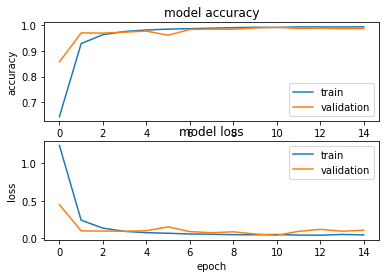

In [14]:
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves
  plt.subplot(2,1,1)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper right')

  plt.show()

learning_curve(history)

In [20]:
predictions=model.predict(test_X)

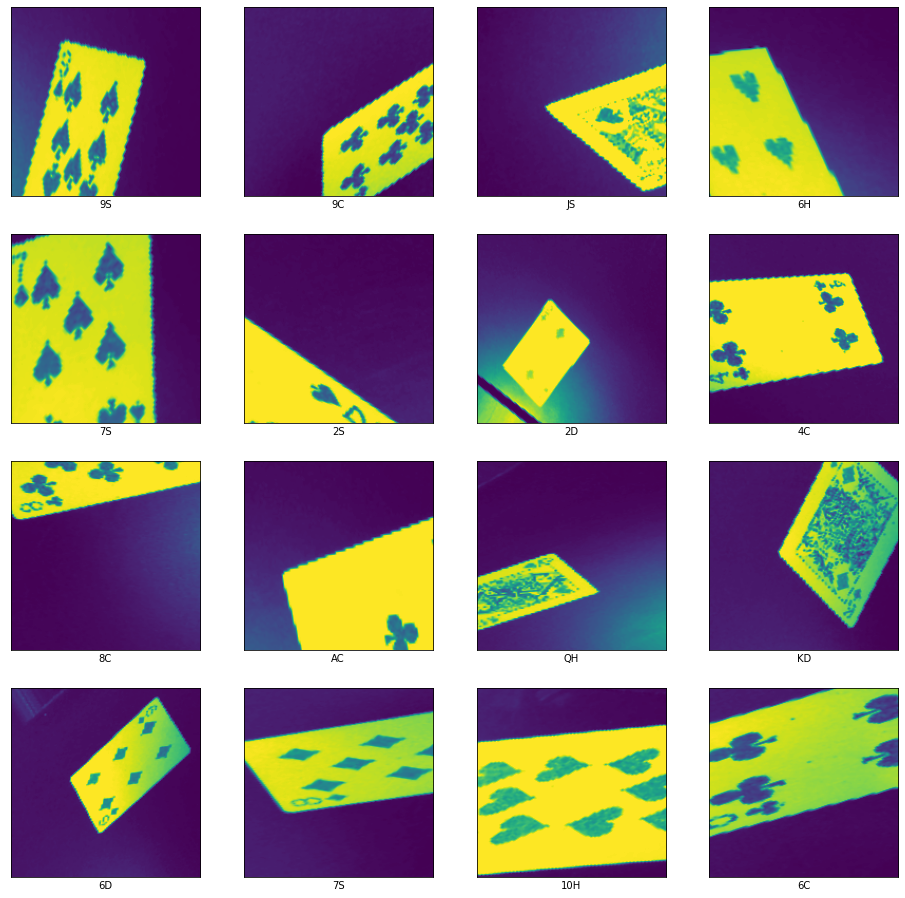

In [35]:
sample=test_X[:16]

plt.figure(figsize=(16,16))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(sample[i].reshape(sample.shape[1], sample.shape[2]))
    # get the index of the greatest probability
    highest_prob_idx=r=predictions[i].argmax()
    # retrun the key based on the value
    value=list(target_dict.keys()) [list(target_dict.values()).index(highest_prob_idx)]
    plt.xlabel(value)
plt.show()

In [26]:
type(predictions)

numpy.ndarray

In [31]:
print(predictions[7000])

[9.1710348e-28 0.0000000e+00 0.0000000e+00 4.5430858e-31 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 6.3610792e-35 0.0000000e+00
 0.0000000e+00 6.3085167e-36 0.0000000e+00 8.7647631e-35 0.0000000e+00
 8.5032591e-30 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.5790534e-29 7.5698169e-32 4.7926171e-32 5.6378590e-36 0.0000000e+00
 1.0000000e+00 9.4047846e-30 6.4200743e-35 0.0000000e+00 1.1270490e-29
 1.3988157e-35 1.7048142e-35 3.9853709e-28 8.3219196e-22 1.8747922e-38
 0.0000000e+00 0.0000000e+00 1.0004415e-32 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0316109e-35 0.0000000e+00
 4.6177682e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00]


In [65]:
model.save('C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\card_trained_model')

INFO:tensorflow:Assets written to: C:\Users\glmor\OneDrive\Desktop\521_Final_Project\card_trained_model\assets


In [42]:
test_dict={k: v for v, k in enumerate(np.unique(test_y))}
test_target = [test_dict[test_y[i]] for i in range(len(test_y))]
test_target=np.array(test_target)

model.evaluate(test_X,test_target)

254/254 [==============================] - 597s 2s/step - loss: 0.0982 - accuracy: 0.9855


[0.09822774678468704, 0.9854643940925598]

In [66]:
new_model = tf.keras.models.load_model('C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\card_trained_model')

In [67]:
new_model.evaluate(test_X,test_target)

254/254 [==============================] - 578s 2s/step - loss: 0.0982 - accuracy: 0.9855


[0.09822774678468704, 0.9854643940925598]

In [3]:
import os
import random
#pull random cards to generate 52 card deck
if not os.path.exists('C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\deck'):
  os.mkdir('C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\deck')

In [5]:
import shutil
#generate deck of cards for blackjack
numOfCards=0
while numOfCards != 52:
    img_folder='C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\archive\\Images\\Images'
    file = random.choice(os.listdir(img_folder))
    image_path= os.path.join(img_folder, file)
    if(file.startswith('10')):
        val_and_suit=file[:3]
    else:
        val_and_suit=file[:2]
    
    if not os.path.exists(f'C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\deck\\{val_and_suit}.jpg'):
        shutil.copy(image_path,f'C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\deck\\{val_and_suit}.jpg')
        numOfCards+=1
    else:
        continue

In [32]:
def keep_Count(predicted_value):
    count=0
    if (predicted_value.startswith('2') or predicted_value.startswith('3') or 
    predicted_value.startswith('4') or predicted_value.startswith('5') or predicted_value.startswith('6')):
        count+=1
    elif (predicted_value.startswith('7') or predicted_value.startswith('8') or 
    predicted_value.startswith('9')):
        pass
    else:
        count-=1
    return count

In [238]:
def hand_Value(predicted_value,userHandValue):
    hand_value=0
    if(predicted_value.startswith('2')):
        hand_value+=2
    elif(predicted_value.startswith('3')):
        hand_value+=3
    elif(predicted_value.startswith('4')):
        hand_value+=4
    elif(predicted_value.startswith('5')):
        hand_value+=5
    elif(predicted_value.startswith('6')):
        hand_value+=6
    elif(predicted_value.startswith('7')):
        hand_value+=7
    elif(predicted_value.startswith('8')):
        hand_value+=8
    elif(predicted_value.startswith('9')):
        hand_value+=9
    elif(predicted_value.startswith('A')):
        if userHandValue >= 11:
            hand_value+=1
        else:
            hand_value+=11
    else:
        hand_value+=10
    return hand_value

In [231]:
def basic_Strategy(hand_value, dealer_card, player_cards):
    choice=''
    if not player_cards[0].startswith('A') or not player_cards[1].startswith('A'):
        if 4 <= hand_value <= 7:
            choice='hit'
        elif hand_value == 8:
            choice='hit'
        elif hand_value == 9:
            if dealer_card.startswith('2') or dealer_card.startswith('3') or dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='double'
            else:
                choice='hit'
        elif hand_value == 10:
            if dealer_card.startswith('10') or dealer_card.startswith('J') or dealer_card.startswith('K') or dealer_card.startswith('Q') or dealer_card.startswith('A'):
                choice='hit'
            else:
                choice='double'
        elif hand_value == 11:
            choice='double'
        elif hand_value == 12:
            if dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='stand'
            else:
                choice='hit'
        elif hand_value == 13:
            if dealer_card.startswith('2') or dealer_card.startswith('3') or dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='stand'
            else:
                choice='hit'
        elif hand_value == 14:
            if dealer_card.startswith('2') or dealer_card.startswith('3') or dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='stand'
            else:
                choice='hit'
        elif hand_value == 15:
            if dealer_card.startswith('2') or dealer_card.startswith('3') or dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='stand'
            else:
                choice='hit'
        elif hand_value == 16:
            if dealer_card.startswith('2') or dealer_card.startswith('3') or dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='stand'
            else:
                choice='hit'
        else:
            choice='stand'
    else:
        if player_cards[0].startswith('2') or player_cards[1].startswith('2'):
            if dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='double'
            else:
                choice='hit'
        elif player_cards[0].startswith('3') or player_cards[1].startswith('3'):
            if dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='double'
            else:
                choice='hit'
        elif player_cards[0].startswith('4') or player_cards[1].startswith('4'):
            if dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='double'
            else:
                choice='hit'
        elif player_cards[0].startswith('5') or player_cards[1].startswith('5'):
            if dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='double'
            else:
                choice='hit'
        elif player_cards[0].startswith('6') or player_cards[1].startswith('6'):
            if dealer_card.startswith('2') or dealer_card.startswith('3') or dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='double'
            else:
                choice='hit'
        elif player_cards[0].startswith('7') or player_cards[1].startswith('7'):
            if dealer_card.startswith('2') or dealer_card.startswith('7') or dealer_card.startswith('8'):
                choice='stand'
            elif dealer_card.startswith('3') or dealer_card.startswith('4') or dealer_card.startswith('5') or dealer_card.startswith('6'):
                choice='double'
            else:
                choice='hit'
        elif player_cards[0].startswith('8') or player_cards[1].startswith('8'):
            if dealer_card.startswith('6'):
                choice='double'
            else:
                choice='stand'
        else:
            choice='stand'
        
    return choice

In [111]:
def image_transformation(deck_folder, file):
    image = cv2.imread(deck_folder+"/"+file, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(image, (180, 180))
    imgs = img.reshape((1, img.shape[0], img.shape[1], 1))
    data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0, zoom_range=[.3, .8])
    data_generator.fit(imgs)
    image_iterator = data_generator.flow(imgs)
    img_transformed=image_iterator.next()[0].astype('int')/255
    img_transformed = img_transformed.reshape((1, img.shape[0], img.shape[1], 1))
    return img_transformed

In [112]:
def predict_image(img_transformed,target_dict):
    prediction = new_model.predict(img_transformed)
    highest_prob_idx=r=prediction.argmax()
    # retrun the key based on the value
    value=list(target_dict.keys()) [list(target_dict.values()).index(highest_prob_idx)]
    return value

In [131]:
def reset_values(player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards):
    player_hand_value=0
    dealer_hand_value=0
    num_of_cards=0
    player_hand.clear()
    dealer_hand.clear()
    return player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards

In [185]:
def get_card(deck_folder,cards_in_use):
    file = random.choice(os.listdir(deck_folder))
                    
    if file not in cards_in_use:
        cards_in_use.append(file)
        img_transformed = image_transformation(deck_folder, file)
        value = predict_image(img_transformed,target_dict)
    else:
        value = None 
        
    return value

In [261]:
def bet_amount(count,bet_unit):
    if count <= 1:
        return bet_unit
    else:
        return bet_unit*count

In [276]:
import math
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

def Black_Jack(target_dict):
    # pick random point in deck between 60%-95% that 
    # when reached then the deck is shuffled again (simulates a casino).
    shuffle_limit = math.floor(52*random.uniform(.6, .95))
    cards_in_play=0
    player_hand=[]
    dealer_hand=[]
    cards_in_use = []
    count=0
    player_hand_value = 0
    dealer_hand_value = 0
    bank_roll = 5000.0
    bet_unit = 50.0
    num_of_units = bank_roll/bet_unit
    
    while cards_in_play < shuffle_limit or bank_roll <= 0:
        deck_folder='C:\\Users\\glmor\\OneDrive\\Desktop\\521_Final_Project\\deck'
        num_of_cards=0
        bank_roll_float = "{:.2f}".format(bank_roll)
        print('\n------------------------------------------------------------------')
        print(f"You currently have ${bank_roll_float}")
        amount = bet_amount(count,bet_unit)
        bet_amount_float = "{:.2f}".format(amount)
        print(f"Based on the current count of {count} you will bet ${bet_amount_float}")
        print("\n|||||||||||||||||||||\nNew Hand\n|||||||||||||||||||||\n")
        while num_of_cards<4:
            file = random.choice(os.listdir(deck_folder))
            
            if file not in cards_in_use:
                cards_in_use.append(file)
                img_transformed = image_transformation(deck_folder, file)
                value = predict_image(img_transformed,target_dict)
                
                if num_of_cards % 2 == 0:
                    dealer_hand.append(value)
                    count+=keep_Count(value)
                else:
                    player_hand.append(value)
                    count+=keep_Count(value)
                    player_hand_value+=hand_Value(value,player_hand_value)
                cards_in_play+=1
                num_of_cards+=1
                
            else:
                continue
        dealer_hand_value+=(hand_Value(dealer_hand[0],dealer_hand_value)+hand_Value(dealer_hand[1],dealer_hand_value))
        print("Hand 1:")
        print(str(dealer_hand)+" = "+str(dealer_hand_value))  
        print(str(player_hand)+" = "+str(player_hand_value))
        print("Current Count: ",count)
        print("===============================")
        
        
        if dealer_hand_value == 21 and player_hand_value != 21:
            print("Dealer wins!")
            bank_roll-=amount
            player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards = reset_values(player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards)
            continue
        elif dealer_hand_value == 21 and player_hand_value == 21:
            print("Push")
            player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards = reset_values(player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards)
            continue
        else:
            choice = basic_Strategy(player_hand_value, dealer_hand[1], player_hand)  
            #player
            hand_num=1
            while not choice == 'stand':
                if choice == 'hit':
                    print("Player will hit.")
                    
                    while player_hand_value < 17:
                        value = get_card(deck_folder,cards_in_use)
                        if value is None:
                            continue
                        else:
                            count+=keep_Count(value)
                            cards_in_play+=1
                            player_hand.append(value)
                            hand_num+=1
                            player_hand_value += hand_Value(value,player_hand_value)
                            print(f"Hand {hand_num}:")
                            print(str(dealer_hand)+" = "+str(dealer_hand_value),flush=True)  
                            print(str(player_hand)+" = "+str(player_hand_value),flush=True)
                            print("Current Count: ",count)
                            print("===============================")
                            
                            choice = basic_Strategy(player_hand_value, dealer_hand[1], player_hand) 
                            if choice == 'stand':
                                break
                            else:
                                continue
                #double down
                else:
                    print("Player will double down.")
                    while True:
                        value = get_card(deck_folder,cards_in_use)
                        if value is None:
                            continue
                        else:
                            count+=keep_Count(value)
                            cards_in_play+=1
                            player_hand.append(value)
                            hand_num+=1
                            player_hand_value += hand_Value(value,player_hand_value)
                            print(f"Hand {hand_num}:",flush=True)
                            print(str(dealer_hand)+" = "+str(dealer_hand_value),flush=True)  
                            print(str(player_hand)+" = "+str(player_hand_value),flush=True)
                            print("Current Count: ",count)
                            print("===============================")
                            
                            choice='stand'
                            break

            print("Player will Stand")
            if player_hand_value > 21:
                print("Dealer Wins")
                bank_roll-=amount
                player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards = reset_values(player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards)
                continue
            else:
                while dealer_hand_value < 17:
                    value = get_card(deck_folder,cards_in_use)
                    if value is None:
                        continue
                    else:
                        count+=keep_Count(value)
                        cards_in_play+=1
                        dealer_hand.append(value)
                        dealer_hand_value += hand_Value(value,dealer_hand_value)
                        hand_num+=1
                        print(f"Hand {hand_num}:")
                        print(str(dealer_hand)+" = "+str(dealer_hand_value))  
                        print(str(player_hand)+" = "+str(player_hand_value))
                        print("Current Count: ",count)
                        print("===============================")

                if player_hand_value > 21 or dealer_hand_value > player_hand_value:
                    if dealer_hand_value > 21 and player_hand_value <= 21:
                        print("Player Wins")
                        bank_roll+=amount
                    else:
                        print("Dealer wins")
                        bank_roll-=amount
                    player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards = reset_values(player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards)
                    continue
                elif dealer_hand_value > 21 or dealer_hand_value < player_hand_value:
                    print("Player wins")
                    bank_roll+=amount
                    player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards = reset_values(player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards)
                    continue
                else:
                    print("Push")
                    player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards = reset_values(player_hand_value,dealer_hand_value,player_hand,dealer_hand,num_of_cards)
                    continue
                    
    profit = bank_roll - 5000.0
    if profit > 0:
        profit_float = "{:.2f}".format(profit)
        print(f'\nYou have made ${profit}')
    else:
        profit*=-1
        profit_float = "{:.2f}".format(profit)
        print(f'\nYou have lost ${profit}')

In [275]:
target_dict={'10C': 0,
 '10D': 1,
 '10H': 2,
 '10S': 3,
 '2C': 4,
 '2D': 5,
 '2H': 6,
 '2S': 7,
 '3C': 8,
 '3D': 9,
 '3H': 10,
 '3S': 11,
 '4C': 12,
 '4D': 13,
 '4H': 14,
 '4S': 15,
 '5C': 16,
 '5D': 17,
 '5H': 18,
 '5S': 19,
 '6C': 20,
 '6D': 21,
 '6H': 22,
 '6S': 23,
 '7C': 24,
 '7D': 25,
 '7H': 26,
 '7S': 27,
 '8C': 28,
 '8D': 29,
 '8H': 30,
 '8S': 31,
 '9C': 32,
 '9D': 33,
 '9H': 34,
 '9S': 35,
 'AC': 36,
 'AD': 37,
 'AH': 38,
 'AS': 39,
 'JC': 40,
 'JD': 41,
 'JH': 42,
 'JS': 43,
 'KC': 44,
 'KD': 45,
 'KH': 46,
 'KS': 47,
 'QC': 48,
 'QD': 49,
 'QH': 50,
 'QS': 51}

Black_Jack(target_dict)


------------------------------------------------------------------
You currently have $5000.00
Based on the current count of 0 you will bet $50.00

|||||||||||||||||||||
New Hand
|||||||||||||||||||||

Hand 1:
['2H', '8S'] = 10
['3H', 'JD'] = 13
Current Count:  1
Player will hit.
Hand 2:
['2H', '8S'] = 10
['3H', 'JD', 'QS'] = 23
Current Count:  0
Player will Stand
Dealer Wins

------------------------------------------------------------------
You currently have $4950.00
Based on the current count of 0 you will bet $50.00

|||||||||||||||||||||
New Hand
|||||||||||||||||||||

Hand 1:
['8H', '6S'] = 14
['2S', 'AH'] = 13
Current Count:  1
Player will Stand
Hand 2:
['8H', '6S', '5S'] = 19
['2S', 'AH'] = 13
Current Count:  2
Dealer wins

------------------------------------------------------------------
You currently have $4900.00
Based on the current count of 2 you will bet $100.00

|||||||||||||||||||||
New Hand
|||||||||||||||||||||

Hand 1:
['10D', '3D'] = 13
['7C', '10S'] = 17
Current